In [1]:
from quantum_badger import *
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats=['svg'] 

import pandas as pd

colors = ['#8ECAE6', '#219EBC', '#023047', '#FFCB47', '#FFB703', '#FB8500', '#BB0A21']

from numba import njit


# The first work regime: "Just give me results!"

Generally speaking, this operation mode needs the complex GBS matrix and samples. To get the matrix, you need to initialize the GBS simulator. Samples for a fixed number of clicked detectors can be generated from the uniform distribution. 

## Initialize the Gaussian Boson Sampling Emulator

There are three options for the initialization: 
1) Import your own parameters of input states and the interferometer matrix as files; 
2) Import your own interferometer matrix and set the parameters of the input state manually; 
3) Set the parameters of the input state manually and generate a random interferometer matrix.

### Option 1: import parameters of your GBS device


In [ ]:
# Step 0: create foldes for the data
#path = create_path(filename='demo.ipynb')
path = "/Users/anastasiacertkova/Desktop/Coding/data/21_13-16_06_2023"
# Use the line below this for reproducibility 
random.seed(42)

# Step 1: Create lists contained squeezing parameters and phases of input states
n = int(m/2)
r_ = [1.4]*n + [0]*(m-n)
phi_ = [0]*m

A = set_input(r_, phi_, path)

# Step 2: Import the interferometer matrix
U = import_interferometer(path, "/matrix_U.dat") 

# Step 3: Export the main GBS matrix 
M = set_device_parameters(r, A, U, path)

### Option 2: import parameters of your interferometer and the parameters of the input state manually

Step 0: Create foldes for the data

Step 1: Set the GBS device parameters, such as 

* number of modes `m`
* number of inputs filled by squeezed states `n`
* squeezing parameter of the input squeezed vacuum states `r`

Step 2: Import the interferometer matrix 

You must have a `matrix_U.dat` file for this regime in your directory. Here and further, we record the real part of complex numbers in odd columns, which are tabular separated from the image part in even columns. 

Step 3: Export the main GBS matrix 

The result matrix will be saved in a file `GBS_matrix.dat`

In [6]:
# Step 0: create foldes for the data
#path = create_path(filename='demo.ipynb')
path = "/Users/anastasiacertkova/Desktop/Coding/data/21_13-16_06_2023"
# Use the line below this for reproducibility 
random.seed(42)

# Step 1: Set the GBS device parameters

#  Number of modes 
m = 8
#  Number of input squeezed states
n = round(m/2) 
#  Squeezing parameter of the input squeezed vacuum states
r = 1.6

r_, phi_ = input_state(r, m, n) 
A = set_input(r_, phi_, path)

# Step 2: Import the interferometer matrix
U = import_interferometer(path, "/matrix_U.dat") 

# Step 3: Export the main GBS matrix 
M = set_device_parameters(r, A, U, path)


Data were exported to /Users/anastasiacertkova/Desktop/Coding/data/21_13-16_06_2023/initial_state.dat
Data were exported to /Users/anastasiacertkova/Desktop/Coding/data/21_13-16_06_2023/GBS_matrix.dat


### Option 3: Use a default GBS setup

Step 0: Create foldes for the data

Step 1: Set the GBS device parameters, such as 

* number of modes `m`
* squeezing parameter of the input squeezed vacuum states `r`

Step 2: Generate the interferometer matrix and GBS matrix

In `choose_default_device()` method we use the following default settings: the number of beam splitters is $m^2$ and the number of filled inputs $n=m/2$.



**Notes**

- If you want to experiment with interferometer matrices, you can use
`get_random_interferometer(m, n_BS)` method, where `n_BS` is the number of beam splitters. It produces two output files `matrix_U.dat` and `parameters_of_interferometer.dat`. which can be used  `set_device_parameters()` as decribed above. You also can generate interferometer matrix for  `parameters_of_interferometer.dat` specifing the filepath  `get_random_interferometer(m, n_BS, path=path)`. 

- *You also can import previously generated data using the following command:*

`M, m, n, r, n_cutoff, n_mc, batch_size = import_input(path, "GBS_matrix.dat")`

In [30]:
# Step 0: create foldes for the data
#path = create_path(filename='demo.ipynb')
path = "/Users/anastasiacertkova/Desktop/Coding/data/21_13-16_06_2023"
# Use the line below this for reproducibility 
random.seed(42)

# Step 1: Set the GBS device parameters
#  Number of modes 
m = 8
#  Number of input squeezed states
n = round(m/2) 
#  Squeezing parameter of the input squeezed vacuum states
r = 1.6
#  Number of beam splitters 
n_BS = m**2

M, U = choose_default_device(m, r, path=path)

# or
# M, m, n, r, n_cutoff, n_mc, batch_size = import_input(path, "/GBS_matrix.dat")

Data were exported to /Users/anastasiacertkova/Desktop/Coding/data/21_13-16_06_2023
Data were exported /Users/anastasiacertkova/Desktop/Coding/data/21_13-16_06_2023 in files initial_state.dat, parameters_of_interferometer.dat, matrix_U.dat, GBS_matrix.dat 


## Generate or import samples

At this stage, you can uniformly generate the `batch_size` number of samples using the `uniform_sampling_tr()` method and export them with `export_samples()`. If you would like to get samples with a fixed number of clicked detectors, you need to specify the `n_clicked` argument. 

Also, you are able to import previously generated samples using `import_samples()`. The imported file must consist of a collection of binary sequence samples, with each sample starting on a new line, for example

```
11010100
10100011
00101101
00101110
11100001
10001011
```

In [31]:
batch_size = 10 
n_clicked = int(m/2)

samples = uniform_sampling_tr(batch_size,n_clicked,m)
export_samples(samples, path, "/samples.dat")

# or
# samples = import_samples(path, "/samples.dat")

samples

[[1, 1, 0, 1, 0, 1, 0, 0],
 [1, 0, 1, 0, 0, 0, 1, 1],
 [0, 0, 1, 0, 1, 1, 0, 1],
 [0, 0, 1, 0, 1, 1, 1, 0],
 [1, 1, 1, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 1, 0, 1, 1],
 [0, 0, 1, 0, 0, 1, 1, 1],
 [1, 0, 0, 0, 1, 0, 1, 1],
 [0, 1, 1, 0, 1, 0, 1, 0],
 [1, 0, 0, 1, 0, 1, 0, 1]]

## Get approximate probabilities

`dict_probabilities` is a dictionary containing unique samples and probabilities for them. 

In [32]:
dict_probabilities = compute_probabilities(samples, path=path)

Data were imported from /Users/anastasiacertkova/Desktop/Coding/data/21_13-16_06_2023/GBS_matrix.dat


## Obtain DataFrame with results

In [33]:
df = get_result_df(samples, M, dict_probabilities, exact_prob = True)
dict_format = get_dict_format(df)   

df.info()
df.style.format(dict_format)

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 11010100 to 10010101
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   n_clicks              9 non-null      int64  
 1   probability_exact     9 non-null      float64
 2   n_counts              9 non-null      int64  
 3   probability_approx_2  9 non-null      float64
 4   probability_approx_3  3 non-null      float64
 5   probability_approx_4  5 non-null      float64
dtypes: float64(4), int64(2)
memory usage: 504.0+ bytes


,n_clicks,probability_exact,n_counts,probability_approx_2,probability_approx_3,probability_approx_4
sample,,,,,,
11010100,4,1.540e-03,1,1.672e-02,nan,nan
10100011,4,3.838e-04,1,7.427e-03,nan,nan
00101101,4,3.223e-05,1,1.349e-03,nan,nan
00101110,4,8.449e-06,1,4.232e-04,4.546e-04,2.636e-04
11100001,4,2.033e-03,1,2.062e-02,nan,nan
10001011,4,2.347e-04,2,4.174e-03,nan,-3.725e+111
00100111,4,4.571e-06,1,1.744e-04,1.709e-04,1.192e-04
01101010,4,3.818e-04,1,4.538e-03,4.904e-03,5.453e-03
10010101,4,1.101e-04,1,2.310e-03,nan,2.206e-03


In [ ]:
#export DataFrame
df.to_csv(path + "/output/samples_probabilities.csv") 

## Test the approximate probabilities

### Relative weighted error 
### Fidelity 
### Total Variation Distance 

---
## Test samples 

### HOG test 
### Bayesian Test

# The second work regime: "Show me how it works!"

## Compute all possible probabilities exactly

Here we generate DataFrame with probabilities of all basis states. 

In [15]:
M, m, n, r, n_cutoff, n_mc, batch_size = import_input(path, "/GBS_matrix.dat")

df_basis = get_basis_df(M)
df_basis.info()
df_basis.head()

Data were imported from /Users/anastasiacertkova/Desktop/Coding/data/21_13-16_06_2023/GBS_matrix.dat
sum prob: 1.000e+00
<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 00000000 to 11111111
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   n_clicks           256 non-null    int64  
 1   probability_exact  256 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.0+ KB


,n_clicks,probability_exact
sample,,
00000000,0,0.022658
10000000,1,0.000160
01000000,1,0.000711
00100000,1,0.000725
00010000,1,0.000244


#### Find probability of a specific sample in DataFrame

In [16]:
sample = [0]*m 

# or sample ='00000' without convert_list_to_str() method

df_basis["probability_exact"].loc[convert_list_to_str(sample)] 

0.02265840055440371

#### Total probability mass function of a small Gaussian Boson Sampling device

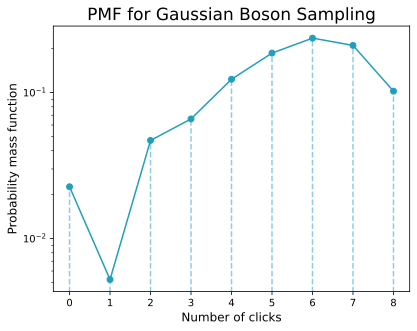

In [17]:
pmf_values = [sum(df_basis["probability_exact"][df_basis["n_clicks"] == n]) for n in range(m+1)]

plt.vlines(
    range(m+1), 
    0,
    pmf_values, 
    color = colors[0],
    linestyles='dashed'
)

plt.plot(
    range(m+1), 
    pmf_values,
    'o-',
    color = colors[1]
)

plt.yscale('log')
plt.xlabel("Number of clicks", fontsize=12)
plt.ylabel("Probability mass function", fontsize=12)
plt.title("PMF for Gaussian Boson Sampling", fontsize=17);
plt.show()

## Validation with Strawberry Fields




## What do sectors look like?
---
#### Total probability mass function of sectors 

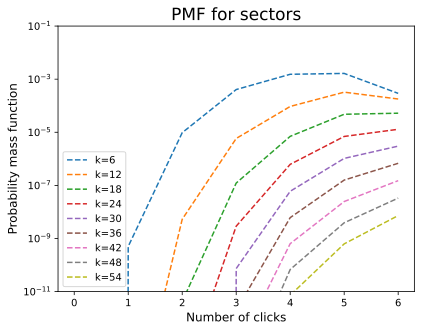

In [18]:
sample = [1]*(m-2) + [0]*2 # just for example
n_clicked = sum(sample)

P_sectors = prob_sectors_exact(M, sample=sample)

for nu in range(n_clicked,n_clicked*10, n_clicked):
    plt.plot(
        range(n_clicked+1),
        [P_sectors[j,nu] for j in range(n_clicked+1)],
        '--' ,
        label = 'k='+str(nu)
)
plt.yscale('log')
plt.ylim(10**(-11), 10**(-1))
plt.legend(prop={'size':10}, loc='lower left')
plt.xlabel("Number of clicks", fontsize=12)
plt.ylabel("Probability mass function", fontsize=12)
plt.title("PMF for sectors", fontsize=17);
plt.show()

---
#### Probability mass function of sectors for a sample

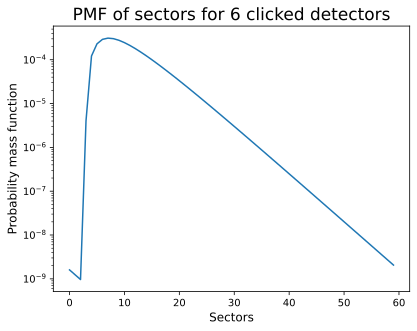

In [20]:
sample = [1]*(m-2) + [0]*2 # just for example
n_clicked = sum(sample)
nu_max = 10*n_clicked


plt.plot(
        range(nu_max),
        [P_sectors[n_clicked,nu] for nu in range(nu_max)],
        '-' 
)
plt.yscale('log')
#plt.legend(prop={'size':10}, loc='lower left')
plt.xlabel("Sectors", fontsize=12)
plt.ylabel("Probability mass function", fontsize=12)
plt.title(f"PMF of sectors for {n_clicked} clicked detectors", fontsize=17);
plt.show()

---
#### Convergence of a sum over sectors to the exact result 

In [23]:
# Comparison of calculation of the exact probabilities with and without sectors

sample = [1]*(m-2) + [0]*2 # just for example
n_clicked = sum(sample)
nu_max = 10*n_clicked


P_sectors =  prob_sectors_exact(M, sample=sample)

P_ = 0
for nu in range(nu_max):
    P_ += P_sectors[n_clicked,nu]
    

print("Exact probability: ", "{:.3e}".format(P_)) 
print("Probability summed over sectors: ",
      "{:.3e}".format(df_basis["probability_exact"].loc[convert_list_to_str(sample)]))

Exact probability:  2.946e-03
Probability summed over sectors:  2.946e-03


#### Approximate probability mass function of sectors for a sample


---
### Noisy Interferometer Matrix Generation

In [ ]:
error = 0.05

ind, phi, psi, eta = import_parameters_interferometer(path, '/parameters_of_interferometer.dat')
U_appr = interferometer_approx(n_BS, ind, phi, psi, eta, error,  m)

export_complex_matrix(path + r"/matrix_U_appr.dat", U_appr)

print("Frobenius distance between U and U_appr:", round(frobenius_distance(U, U_appr),2) )